In [27]:
import sys
sys.path.append('../')
from utils import *
import pandas as pd
pd.set_option('display.max_columns', None)
pd.option_context("display.max_rows", None)
pd.set_option('precision', 2)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from datetime import datetime
import time
import warnings
warnings.filterwarnings("ignore")

## Premium file

In [28]:
# load main file
pm = pd.read_excel("../../01_Data/01_Raw/DATASET_TRAIN_v2.xlsx")
pm.head()

,DIVISION_ID,FACUL_NUM,TAG,DIVISION_NUM,SEGMENT_LOB,UF_STATUS,CT_STATUS,UWYEAR,INCEPTION_MONTH,INCEPTION,EXPIRY,CT_PERIOD,MARKET,SUBSECTOR,MAINOCCUPANCY,SECTOR,BUSINESSUNIT,UWCENTER,SCOPE_PERILS,SUBSIDIARY,COVERAGE,PARTTYPE,MAIN_COUNTRY,GUARANTEE,MAIN_PRICING_CATEG,MAIN_PRICING_SUBCATEG,BI_TYPE,BI_PERIOD,TC_PROFIT_COMMISSION,DEDUCTIBLES,INSUREDVALUEPD,INSUREDVALUEBI,TOTALINSUREDVALUE,NBLOCS,OIL,LIMIT,ATTACHMENT,SCOR_SHARE,PREMIUM,MODELED_CAT_EXPLOSS,DISCOUNTS,DEDUCTION,EXT_EXPENSE,WORDING,QUALITY_RISK_MGT,ASSET_QUALITY,BI_MITIGATION,MB_QUALITY,REPORTCCY,ORIGCCY,TXCHANGE,PRICING_DATE,FXRATEUSD,TOP_MPL,TOP_FMLS
0,780502,02F062851,Bound,4,Ppty Non Energy,Active,Finalized,2019-1,APRIL,2019-04-01,2020-03-31,12,ARGENTINA,MINING COMPANY,Precious Metals Mines,BS Energy,BS Energy Mining,EMEA,All Risks,SCOR REASSURANCE,"PD,BI",Excess of Loss,Argentina,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,0.0,"PD: ,9M, BI: 30Day(s)",4.33e+08,1.81e+08,6.14e+08,1,0.0,3.59e+08,6.60e+06,0.10,51556.79,0.0,0.0,0.09,0.09,Standard,Average,Average,Average,NaN,EUR,USD,0.88,2019-02-28,1.0,1.99e+08,NaN
1,632208,11F008861,Bound,1,Ppty Non Energy,Active,Finalized,2017-1,APRIL,2017-04-30,2018-06-30,12,CANADA,MINING COMPANY,Precious Metals Mines,BS Energy,BS Energy Mining,CANADA,All Risks,SCOR CANADA,"PD,BI",Quota-Share,Argentina,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,0.0,"PD: ,5M, BI: 30Day(s)",5.37e+08,1.64e+08,7.01e+08,3,0.0,1.86e+08,0.00e+00,0.07,101618.14,0.0,0.0,0.12,0.12,Standard,Average,Average,Average,NaN,EUR,USD,0.93,2017-04-11,1.0,1.86e+08,NaN
2,717370,02F062851,Bound,4,Ppty Non Energy,Active,Finalized,2018-1,MARCH,2018-03-01,2019-03-31,12,ARGENTINA,MINING COMPANY,Precious Metals Mines,BS Energy,BS Energy Mining,EMEA,All Risks,SCOR REASSURANCE,"PD,BI",Excess of Loss,Argentina,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,0.0,"PD: ,8M, BI: 30Day(s)",4.18e+08,2.40e+08,6.58e+08,1,0.0,3.43e+08,6.32e+06,0.10,45815.49,0.0,0.0,0.13,0.13,Standard,Average,Average,Average,NaN,EUR,USD,0.84,2018-03-01,1.0,2.57e+08,NaN
3,754682,FA0020462,Bound,1,Ppty Non Energy,Active,Finalized,2018-1,JUNE,2018-06-30,2019-06-30,12,CANADA,MINING COMPANY,Precious Metals Mines,BS Energy,BS Energy Mining,CANADA,All Risks,SCOR CANADA,"PD,BI",Quota-Share,Argentina,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,0.0,"PD: ,4M, BI: 30Day(s)",4.90e+08,2.27e+08,7.17e+08,3,0.0,1.68e+08,0.00e+00,0.03,35547.13,0.0,0.0,0.11,0.11,Standard,Average,Average,Average,NaN,EUR,USD,0.84,2018-06-29,1.0,2.29e+08,NaN
4,597820,02F062851,Bound,4,Ppty Non Energy,Active,Finalized,2017-1,MARCH,2017-03-01,2018-02-28,12,ARGENTINA,MINING COMPANY,Precious Metals Mines,BS Energy,BS Energy Mining,EMEA,All Risks,SCOR REASSURANCE,"PD,BI",Excess of Loss,Argentina,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,0.0,"PD: ,9M, BI: 30Day(s)",4.53e+08,2.53e+08,7.06e+08,1,0.0,3.79e+08,6.97e+06,0.10,69669.24,0.0,0.0,0.14,0.14,Standard,Average,Average,Average,NaN,EUR,USD,0.93,2017-02-28,1.0,2.35e+08,NaN


In [29]:
pm = pm[['FACUL_NUM', 'DIVISION_NUM','TAG', 'SEGMENT_LOB',
       'UF_STATUS', 'CT_STATUS', 'UWYEAR', 'INCEPTION',
         'CT_PERIOD', 'MARKET', 'MAIN_COUNTRY','SUBSECTOR', 'MAINOCCUPANCY',
       'BUSINESSUNIT', 'UWCENTER', 'COVERAGE',
       'PARTTYPE', 'GUARANTEE', 'MAIN_PRICING_CATEG',
       'MAIN_PRICING_SUBCATEG', 'BI_TYPE', 'BI_PERIOD',
       'DEDUCTIBLES', 'INSUREDVALUEPD', 'INSUREDVALUEBI', 'TOTALINSUREDVALUE',
       'NBLOCS', 'OIL', 'LIMIT', 'ATTACHMENT', 'SCOR_SHARE', 'PREMIUM',
       'MODELED_CAT_EXPLOSS', 'DISCOUNTS', 'DEDUCTION', 'EXT_EXPENSE',
       'WORDING', 'QUALITY_RISK_MGT', 'ASSET_QUALITY', 'BI_MITIGATION',
       'MB_QUALITY', 'ORIGCCY', 'TXCHANGE', 'PRICING_DATE',
       'FXRATEUSD', 'TOP_MPL', 'TOP_FMLS']]

In [30]:
# clean and create new columns
preprocess(pm)

,FACUL_NUM,DIVISION_NUM,TAG,SEGMENT_LOB,UF_STATUS,CT_STATUS,UWYEAR,CT_PERIOD,MARKET,MAIN_COUNTRY,SUBSECTOR,MAINOCCUPANCY,BUSINESSUNIT,UWCENTER,COVERAGE,PARTTYPE,GUARANTEE,MAIN_PRICING_CATEG,MAIN_PRICING_SUBCATEG,BI_TYPE,BI_PERIOD,INSUREDVALUEPD,INSUREDVALUEBI,TOTALINSUREDVALUE,NBLOCS,OIL,LIMIT,ATTACHMENT,SCOR_SHARE,PREMIUM,MODELED_CAT_EXPLOSS,DISCOUNTS,DEDUCTION,EXT_EXPENSE,WORDING,QUALITY_RISK_MGT,ASSET_QUALITY,BI_MITIGATION,MB_QUALITY,ORIGCCY,TXCHANGE,FXRATEUSD,TOP_MPL,TOP_FMLS,pd_bi,pd,bi,inception_year,inception_month,inception_duration,pricing_duration,diff
0,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2019,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.33e+08,1.81e+08,6.14e+08,1,0.0,3.59e+08,6.60e+06,0.10,51556.79,0.0,0.0,0.09,0.09,Standard,Average,Average,Average,NaN,USD,0.88,1.0,1.99e+08,NaN,NaN,0.9,30.0,2019,4,707,739,32
1,11F008861,1,Bound,Ppty Non Energy,Active,Finalized,2017,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,5.37e+08,1.64e+08,7.01e+08,3,0.0,1.86e+08,0.00e+00,0.07,101618.14,0.0,0.0,0.12,0.12,Standard,Average,Average,Average,NaN,USD,0.93,1.0,1.86e+08,NaN,NaN,0.5,30.0,2017,4,1408,1427,19
2,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2018,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.18e+08,2.40e+08,6.58e+08,1,0.0,3.43e+08,6.32e+06,0.10,45815.49,0.0,0.0,0.13,0.13,Standard,Average,Average,Average,NaN,USD,0.84,1.0,2.57e+08,NaN,NaN,0.8,30.0,2018,3,1103,1103,0
3,FA0020462,1,Bound,Ppty Non Energy,Active,Finalized,2018,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.90e+08,2.27e+08,7.17e+08,3,0.0,1.68e+08,0.00e+00,0.03,35547.13,0.0,0.0,0.11,0.11,Standard,Average,Average,Average,NaN,USD,0.84,1.0,2.29e+08,NaN,NaN,0.4,30.0,2018,6,982,983,1
4,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2017,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.53e+08,2.53e+08,7.06e+08,1,0.0,3.79e+08,6.97e+06,0.10,69669.24,0.0,0.0,0.14,0.14,Standard,Average,Average,Average,NaN,USD,0.93,1.0,2.35e+08,NaN,NaN,0.9,30.0,2017,3,1468,1469,1


,FACUL_NUM,DIVISION_NUM,TAG,SEGMENT_LOB,UF_STATUS,CT_STATUS,UWYEAR,CT_PERIOD,MARKET,MAIN_COUNTRY,SUBSECTOR,MAINOCCUPANCY,BUSINESSUNIT,UWCENTER,COVERAGE,PARTTYPE,GUARANTEE,MAIN_PRICING_CATEG,MAIN_PRICING_SUBCATEG,BI_TYPE,BI_PERIOD,INSUREDVALUEPD,INSUREDVALUEBI,TOTALINSUREDVALUE,NBLOCS,OIL,LIMIT,ATTACHMENT,SCOR_SHARE,PREMIUM,MODELED_CAT_EXPLOSS,DISCOUNTS,DEDUCTION,EXT_EXPENSE,WORDING,QUALITY_RISK_MGT,ASSET_QUALITY,BI_MITIGATION,MB_QUALITY,ORIGCCY,TXCHANGE,FXRATEUSD,TOP_MPL,TOP_FMLS,pd_bi,pd,bi,inception_year,inception_month,inception_duration,pricing_duration,diff,premium_level
0,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2019,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.33e+08,1.81e+08,6.14e+08,1,0.0,3.59e+08,6.60e+06,0.10,51556.79,0.0,0.0,0.09,0.09,Standard,Average,Average,Average,NaN,USD,0.88,1.0,1.99e+08,NaN,NaN,0.9,30.0,2019,4,707,739,32,< 60K
1,11F008861,1,Bound,Ppty Non Energy,Active,Finalized,2017,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,5.37e+08,1.64e+08,7.01e+08,3,0.0,1.86e+08,0.00e+00,0.07,101618.14,0.0,0.0,0.12,0.12,Standard,Average,Average,Average,NaN,USD,0.93,1.0,1.86e+08,NaN,NaN,0.5,30.0,2017,4,1408,1427,19,60K ~ 220K
2,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2018,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.18e+08,2.40e+08,6.58e+08,1,0.0,3.43e+08,6.32e+06,0.10,45815.49,0.0,0.0,0.13,0.13,Standard,Average,Average,Average,NaN,USD,0.84,1.0,2.57e+08,NaN,NaN,0.8,30.0,2018,3,1103,1103,0,< 60K
3,FA0020462,1,Bound,Ppty Non Energy,Active,Finalized,2018,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.90e+08,2.27e+08,7.17e+08,3,0.0,1.68e+08,0.00e+00,0.03,35547.13,0.0,0.0,0.11,0.11,Standard,Average,Average,Average,NaN,USD,0.84,1.0,2.29e+08,NaN,NaN,0.4,30.0,2018,6,982,983,1,< 60K
4,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2017,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.53e+08,2.53e+08,7.06e+08,1,0.0,3.79e+08,6.97e+06,0.10,69669.24,0.0,0.0,0.14,0.14,Standard,Average,Average,Average,NaN,USD,0.93,1.0,2.35e+08,NaN,NaN,0.9,30.0,2017,3,1468,1469,1,60K ~ 220K


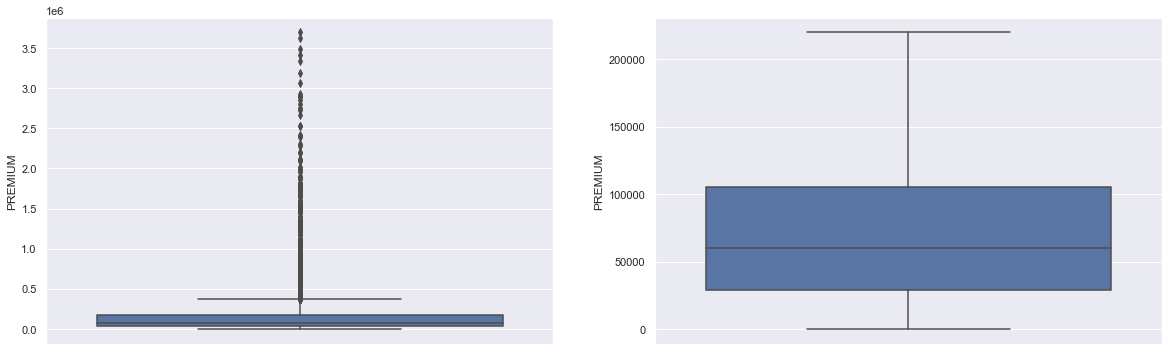

In [31]:
# create a new dimension by degree of loss
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.boxplot(data=pm, y= 'PREMIUM', ax=axs[0] )
sns.boxplot(data=pm[pm.PREMIUM < 220000], y= 'PREMIUM', ax=axs[1] )

cut = [0, 60000, 220000, 1000000000]
labels = ['< 60K','60K ~ 220K','> 220K']
pm["premium_level"] = pd.cut(pm.PREMIUM, cut, labels=labels)
pm.head()

In [32]:
uw = pd.read_excel('../../01_Data/01_Raw/UW_Ratio.xlsx', 'Processed3')
pm_uw = pm.merge(uw, on=['FACUL_NUM'], how='left')
pm_uw['UWY_first'] = (2021 - pm_uw['UWY_first'])
pm_uw.head()

,FACUL_NUM,DIVISION_NUM,TAG,SEGMENT_LOB,UF_STATUS,CT_STATUS,UWYEAR,CT_PERIOD,MARKET,MAIN_COUNTRY,SUBSECTOR,MAINOCCUPANCY,BUSINESSUNIT,UWCENTER,COVERAGE,PARTTYPE,GUARANTEE,MAIN_PRICING_CATEG,MAIN_PRICING_SUBCATEG,BI_TYPE,BI_PERIOD,INSUREDVALUEPD,INSUREDVALUEBI,TOTALINSUREDVALUE,NBLOCS,OIL,LIMIT,ATTACHMENT,SCOR_SHARE,PREMIUM,MODELED_CAT_EXPLOSS,DISCOUNTS,DEDUCTION,EXT_EXPENSE,WORDING,QUALITY_RISK_MGT,ASSET_QUALITY,BI_MITIGATION,MB_QUALITY,ORIGCCY,TXCHANGE,FXRATEUSD,TOP_MPL,TOP_FMLS,pd_bi,pd,bi,inception_year,inception_month,inception_duration,pricing_duration,diff,premium_level,UWR_cumultive,UWR_avg,UWY_first
0,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2019,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.33e+08,1.81e+08,6.14e+08,1,0.0,3.59e+08,6.60e+06,0.10,51556.79,0.0,0.0,0.09,0.09,Standard,Average,Average,Average,NaN,USD,0.88,1.0,1.99e+08,NaN,NaN,0.9,30.0,2019,4,707,739,32,< 60K,0.46,6.88,12
1,11F008861,1,Bound,Ppty Non Energy,Active,Finalized,2017,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,5.37e+08,1.64e+08,7.01e+08,3,0.0,1.86e+08,0.00e+00,0.07,101618.14,0.0,0.0,0.12,0.12,Standard,Average,Average,Average,NaN,USD,0.93,1.0,1.86e+08,NaN,NaN,0.5,30.0,2017,4,1408,1427,19,60K ~ 220K,0.07,0.47,5
2,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2018,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.18e+08,2.40e+08,6.58e+08,1,0.0,3.43e+08,6.32e+06,0.10,45815.49,0.0,0.0,0.13,0.13,Standard,Average,Average,Average,NaN,USD,0.84,1.0,2.57e+08,NaN,NaN,0.8,30.0,2018,3,1103,1103,0,< 60K,0.46,6.88,12
3,FA0020462,1,Bound,Ppty Non Energy,Active,Finalized,2018,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.90e+08,2.27e+08,7.17e+08,3,0.0,1.68e+08,0.00e+00,0.03,35547.13,0.0,0.0,0.11,0.11,Standard,Average,Average,Average,NaN,USD,0.84,1.0,2.29e+08,NaN,NaN,0.4,30.0,2018,6,982,983,1,< 60K,0.08,0.40,5
4,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2017,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.53e+08,2.53e+08,7.06e+08,1,0.0,3.79e+08,6.97e+06,0.10,69669.24,0.0,0.0,0.14,0.14,Standard,Average,Average,Average,NaN,USD,0.93,1.0,2.35e+08,NaN,NaN,0.9,30.0,2017,3,1468,1469,1,60K ~ 220K,0.46,6.88,12


In [33]:
pm_uw.shape

(5192, 56)

## Exposure file

In [34]:
ex = pd.read_csv('../../../Common_Repository/exposure_data_v3.csv')
ex.head()

,FACUL_NUM,YEAR,ORDER_NUM,ENDOR_NUM,DIVISION_NUM,COUNTRY,STATE,COUNTY,CITY_NAME,ZIP_CD,LATITUDE,LONGITUDE,ACCURACY_VALIDATE,EXTERNAL_REFERENCE,GEO_CD,OCCUPANCY_SCHEMA,OCCUPANCY_CD,OCCUPANCY_SOURCE,CONSTRUCTION_SCHEMA,CONSTRUCTION_CD,CONSTRUCTION_SOURCE,YR_BLT,NO_OF_STRY,NO_OF_BLDG,SITE_CCY_CD,IV_BUILDING,IV_CONTENT,IV_PD,IV_BI_VAL,BI_DECLARATION_PERIOD,TIV,FOR_INTEREST,BI_TYPE,INTEREST_DECLARATION,MPL_PD,MPL_PD_PERCEN,MPL_PD_TYPE,MPL_BI,MPL_BI_PERCEN,MPL_BI_TYPE,FMLS_PD,FMLS_PD_PERCEN,FMLS_PD_TYPE,FMLS_BI,FMLS_BI_PERCEN,FMLS_BI_TYPE,COVERAGE_TYPE,CATEGORY,SUB_CATEGORY,ASSET_QUALITY,MB_QUALIFIER,LARGEST_UNIT_CAPACITY,OP_STATUS
0,FA0009941,2017,1,0,1,CO,NaN,NaN,Aguachica,205017,8.4,-73.6,1,NaN,CO,ACORD,INDOON002,NaN,ACORD,UNSUNS,NaN,NaN,NaN,NaN,USD,6.06e+06,6.97e+07,7.57e+07,1.01e+07,12.0,8.58e+07,100,NaN,1.0,2.27e+07,30.0,Percentage,1.01e+07,100.0,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,"PD,BI",Midstream - Transportation/Storage,Pure Pipeline,Average,NaN,NaN,0.0
1,FA0021134,2017,1,0,1,US,USA-NY,NY-61,New York,10036,40.8,-74.0,1,NaN,NY-61,ACORD,COMADM002,NaN,ACORD,UNSUNS,NaN,NaN,NaN,NaN,USD,0.00e+00,0.00e+00,0.00e+00,5.50e+07,12.0,5.50e+07,FI,NaN,1.0,0.00e+00,50.0,Percentage,2.75e+07,50.0,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leisure industry,Amusement park/ holidays activity center,Average,NaN,NaN,0.0
2,FA0021134,2017,1,0,1,DE,NaN,NaN,München,NaN,48.1,11.6,1,NaN,DE,ACORD,COMPUB001,WDSHE DE,ACORD,UNSUNS,NaN,NaN,NaN,NaN,USD,0.00e+00,0.00e+00,0.00e+00,6.58e+07,12.0,6.58e+07,FI,NaN,1.0,0.00e+00,50.0,Percentage,3.29e+07,50.0,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leisure industry,Amusement park/ holidays activity center,Average,NaN,NaN,0.0
3,FA0021134,2017,1,0,1,NO,NaN,NaN,Oslo,0278,59.9,10.7,1,NaN,NO,ACORD,COMPUB001,The Walt Disney Company Nordic,ACORD,UNSUNS,NaN,NaN,NaN,NaN,USD,1.66e+05,1.37e+05,3.03e+05,6.04e+07,12.0,6.07e+07,FI,NaN,1.0,1.51e+05,50.0,Percentage,3.02e+07,50.0,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leisure industry,Amusement park/ holidays activity center,Average,NaN,NaN,0.0
4,10F131564,2018,1,2,1,PE,NaN,NaN,Chilca,NaN,-12.5,-76.7,0,NaN,PE,ACORD,COMRTL003,Distribution/Warehouse,ACORD,UNSUNS,NaN,NaN,NaN,NaN,USD,1.50e+07,1.43e+07,2.93e+07,NaN,NaN,NaN,FI,NaN,1.0,2.20e+07,75.0,Percentage,0.00e+00,70.0,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Warehouse,Logistics (medium hazards),NaN,NaN,NaN,0.0


In [35]:
summary(ex)

,Type,unique value,Available Value,% Availability
Column name,,,,
FACUL_NUM,object,4472,7299519,100.00
YEAR,int64,4,7299519,100.00
ORDER_NUM,int64,5,7299519,100.00
ENDOR_NUM,int64,11,7299519,100.00
DIVISION_NUM,int64,12,7299519,100.00
COUNTRY,object,229,7299163,100.00
STATE,object,909,3535746,48.44
COUNTY,object,3775,2600186,35.62
CITY_NAME,object,112082,7137166,97.78


In [36]:
ex = ex[['FACUL_NUM', 'YEAR', 'DIVISION_NUM', 'STATE','ACCURACY_VALIDATE', 'YR_BLT',
       'NO_OF_STRY', 'NO_OF_BLDG', 'IV_BUILDING', 'IV_CONTENT', 'IV_PD', 'CATEGORY',
       'IV_BI_VAL', 'TIV', 'INTEREST_DECLARATION', 'MPL_PD', 'MPL_PD_PERCEN',
       'MPL_BI', 'MPL_BI_PERCEN', 'FMLS_PD', 'FMLS_PD_PERCEN', 'FMLS_BI',
       'FMLS_BI_PERCEN', 'LARGEST_UNIT_CAPACITY']]

In [37]:
# sort value in ascending order and drop duplicate
print('Before: ', ex.shape[0])
ex.sort_values(by='MPL_PD', inplace=True, na_position='first')
ex.drop_duplicates(inplace=True, keep='last')
ex = ex.fillna(0)
print('After: ', ex.shape[0])

Before:  7299519
After:  3562607


In [38]:
ex_g = ex.groupby(['FACUL_NUM','YEAR','DIVISION_NUM']).agg({
                                      'STATE':pd.Series.nunique,
                                      'ACCURACY_VALIDATE':'mean',
                                      'YR_BLT':'mean',
                                      'NO_OF_STRY':'sum',
                                      'NO_OF_BLDG':'sum',
                                      'IV_BUILDING':'sum',
                                      'IV_CONTENT':'sum',
                                      'IV_PD':'sum',
                                      'IV_BI_VAL':'sum',
                                      'TIV':'sum',
                                      'INTEREST_DECLARATION':'sum',
                                     'MPL_PD':'sum',
                                     'MPL_PD_PERCEN':'mean',
                                     'MPL_BI':'mean',
                                     'MPL_BI_PERCEN':'mean',
                                     'FMLS_PD':'sum',
                                     'FMLS_PD_PERCEN':'mean',
                                     'FMLS_BI':'sum',
                                     'FMLS_BI_PERCEN':'mean',
                                     'CATEGORY':pd.Series.nunique,
                                     'LARGEST_UNIT_CAPACITY':'sum'}).reset_index().rename(columns={'STATE':'nb_state',
                                                                                                   'CATEGORY':'nb_category'})
                                      

In [39]:
ex_g.head()

,FACUL_NUM,YEAR,DIVISION_NUM,nb_state,ACCURACY_VALIDATE,YR_BLT,NO_OF_STRY,NO_OF_BLDG,IV_BUILDING,IV_CONTENT,IV_PD,IV_BI_VAL,TIV,INTEREST_DECLARATION,MPL_PD,MPL_PD_PERCEN,MPL_BI,MPL_BI_PERCEN,FMLS_PD,FMLS_PD_PERCEN,FMLS_BI,FMLS_BI_PERCEN,nb_category,LARGEST_UNIT_CAPACITY
0,01F009143,2017,1,1,1.00,0.0,0.0,0.0,2.06e+08,6.54e+08,8.60e+08,9.44e+07,9.54e+08,1.0,3.75e+08,43.61,9.44e+07,100.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1,0.0
1,01F009143,2018,1,1,1.00,0.0,0.0,0.0,2.11e+08,6.67e+08,8.78e+08,1.28e+08,1.01e+09,1.0,3.75e+08,42.73,1.28e+08,100.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1,0.0
2,01F009143,2019,1,1,1.00,0.0,0.0,0.0,2.19e+08,6.94e+08,9.14e+08,2.01e+08,1.11e+09,1.0,3.75e+08,41.04,2.01e+08,100.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1,0.0
3,01F012384,2017,1,6,0.89,0.0,0.0,0.0,8.62e+09,3.77e+10,4.64e+10,3.14e+10,6.84e+10,685.0,2.82e+10,98.03,5.34e+07,101.18,1.87e+07,3.65e-03,4.17e+07,3.65e-03,3,0.0
4,01F012384,2018,1,7,0.93,0.0,0.0,0.0,6.31e+09,3.88e+10,4.51e+10,3.11e+10,7.36e+10,734.0,2.87e+10,98.35,5.15e+07,101.98,1.11e+09,4.79e+00,1.01e+09,4.79e+00,1,0.0


In [40]:
# Merge
df = pm_uw.merge(ex_g, left_on=['FACUL_NUM','UWYEAR','DIVISION_NUM'], right_on=['FACUL_NUM','YEAR','DIVISION_NUM'], how='left')
df.head()

,FACUL_NUM,DIVISION_NUM,TAG,SEGMENT_LOB,UF_STATUS,CT_STATUS,UWYEAR,CT_PERIOD,MARKET,MAIN_COUNTRY,SUBSECTOR,MAINOCCUPANCY,BUSINESSUNIT,UWCENTER,COVERAGE,PARTTYPE,GUARANTEE,MAIN_PRICING_CATEG,MAIN_PRICING_SUBCATEG,BI_TYPE,BI_PERIOD,INSUREDVALUEPD,INSUREDVALUEBI,TOTALINSUREDVALUE,NBLOCS,OIL,LIMIT,ATTACHMENT,SCOR_SHARE,PREMIUM,MODELED_CAT_EXPLOSS,DISCOUNTS,DEDUCTION,EXT_EXPENSE,WORDING,QUALITY_RISK_MGT,ASSET_QUALITY,BI_MITIGATION,MB_QUALITY,ORIGCCY,TXCHANGE,FXRATEUSD,TOP_MPL,TOP_FMLS,pd_bi,pd,bi,inception_year,inception_month,inception_duration,pricing_duration,diff,premium_level,UWR_cumultive,UWR_avg,UWY_first,YEAR,nb_state,ACCURACY_VALIDATE,YR_BLT,NO_OF_STRY,NO_OF_BLDG,IV_BUILDING,IV_CONTENT,IV_PD,IV_BI_VAL,TIV,INTEREST_DECLARATION,MPL_PD,MPL_PD_PERCEN,MPL_BI,MPL_BI_PERCEN,FMLS_PD,FMLS_PD_PERCEN,FMLS_BI,FMLS_BI_PERCEN,nb_category,LARGEST_UNIT_CAPACITY
0,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2019,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.33e+08,1.81e+08,6.14e+08,1,0.0,3.59e+08,6.60e+06,0.10,51556.79,0.0,0.0,0.09,0.09,Standard,Average,Average,Average,NaN,USD,0.88,1.0,1.99e+08,NaN,NaN,0.9,30.0,2019,4,707,739,32,< 60K,0.46,6.88,12,2019,1,1.0,0.0,0.0,0.0,9.92e+08,5.13e+09,6.12e+09,2.31e+09,7.68e+09,19.0,2.00e+07,0.21,1.08e+07,5.26,0.0,0.0,0.0,0.0,1,0.0
1,11F008861,1,Bound,Ppty Non Energy,Active,Finalized,2017,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,5.37e+08,1.64e+08,7.01e+08,3,0.0,1.86e+08,0.00e+00,0.07,101618.14,0.0,0.0,0.12,0.12,Standard,Average,Average,Average,NaN,USD,0.93,1.0,1.86e+08,NaN,NaN,0.5,30.0,2017,4,1408,1427,19,60K ~ 220K,0.07,0.47,5,2017,3,1.0,0.0,0.0,0.0,2.79e+08,2.99e+08,5.78e+08,1.76e+08,7.55e+08,3.0,2.89e+08,50.00,5.87e+07,100.00,0.0,0.0,0.0,0.0,1,0.0
2,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2018,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.18e+08,2.40e+08,6.58e+08,1,0.0,3.43e+08,6.32e+06,0.10,45815.49,0.0,0.0,0.13,0.13,Standard,Average,Average,Average,NaN,USD,0.84,1.0,2.57e+08,NaN,NaN,0.8,30.0,2018,3,1103,1103,0,< 60K,0.46,6.88,12,2018,1,1.0,0.0,0.0,0.0,9.43e+08,4.88e+09,5.82e+09,2.35e+09,6.79e+09,18.0,2.00e+07,0.22,1.58e+07,5.56,0.0,0.0,0.0,0.0,1,0.0
3,FA0020462,1,Bound,Ppty Non Energy,Active,Finalized,2018,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.90e+08,2.27e+08,7.17e+08,3,0.0,1.68e+08,0.00e+00,0.03,35547.13,0.0,0.0,0.11,0.11,Standard,Average,Average,Average,NaN,USD,0.84,1.0,2.29e+08,NaN,NaN,0.4,30.0,2018,6,982,983,1,< 60K,0.08,0.40,5,2018,3,1.0,0.0,0.0,0.0,9.31e+07,4.89e+08,5.82e+08,2.70e+08,8.52e+08,3.0,2.91e+08,50.00,8.99e+07,100.00,0.0,0.0,0.0,0.0,1,0.0
4,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2017,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.53e+08,2.53e+08,7.06e+08,1,0.0,3.79e+08,6.97e+06,0.10,69669.24,0.0,0.0,0.14,0.14,Standard,Average,Average,Average,NaN,USD,0.93,1.0,2.35e+08,NaN,NaN,0.9,30.0,2017,3,1468,1469,1,60K ~ 220K,0.46,6.88,12,2017,1,1.0,0.0,0.0,0.0,1.33e+09,6.12e+09,7.45e+09,2.93e+09,8.54e+09,23.0,4.88e+07,0.43,8.89e+06,3.26,0.0,0.0,0.0,0.0,1,0.0


In [41]:
df.to_excel("../../01_Data/02_Processed/processed_v1.xlsx", index=False)

# Merge with external natural hazard data

In [42]:
nc = pd.read_csv('../../01_Data/02_Processed/hazard_disaster_risk_v2.csv')
nc.head()

,FACUL_NUM,YEAR,DIVISION_NUM,EARTHQ_EXP,CYC_EXP,CYCPRO_EXP,FLD_EXP,MHZ_EXP,MHZPRO_EXP,VOL_EXP
0,01F009143,2017,1,0.0,0.0,0.0,0.00,0.00,0.00,0.0
1,01F009143,2018,1,0.0,0.0,0.0,0.00,0.00,0.00,0.0
2,01F009143,2019,1,0.0,0.0,0.0,0.00,0.00,0.00,0.0
3,01F012384,2017,1,0.0,0.0,0.0,38.75,50.72,57.72,0.0
4,01F012384,2018,1,0.0,0.0,0.0,41.60,61.78,65.40,0.0


In [43]:
# Merge
df = df.merge(nc, left_on=['FACUL_NUM','YEAR','DIVISION_NUM'], right_on=['FACUL_NUM','YEAR','DIVISION_NUM'], how='left')
df.head()

,FACUL_NUM,DIVISION_NUM,TAG,SEGMENT_LOB,UF_STATUS,CT_STATUS,UWYEAR,CT_PERIOD,MARKET,MAIN_COUNTRY,SUBSECTOR,MAINOCCUPANCY,BUSINESSUNIT,UWCENTER,COVERAGE,PARTTYPE,GUARANTEE,MAIN_PRICING_CATEG,MAIN_PRICING_SUBCATEG,BI_TYPE,BI_PERIOD,INSUREDVALUEPD,INSUREDVALUEBI,TOTALINSUREDVALUE,NBLOCS,OIL,LIMIT,ATTACHMENT,SCOR_SHARE,PREMIUM,MODELED_CAT_EXPLOSS,DISCOUNTS,DEDUCTION,EXT_EXPENSE,WORDING,QUALITY_RISK_MGT,ASSET_QUALITY,BI_MITIGATION,MB_QUALITY,ORIGCCY,TXCHANGE,FXRATEUSD,TOP_MPL,TOP_FMLS,pd_bi,pd,bi,inception_year,inception_month,inception_duration,pricing_duration,diff,premium_level,UWR_cumultive,UWR_avg,UWY_first,YEAR,nb_state,ACCURACY_VALIDATE,YR_BLT,NO_OF_STRY,NO_OF_BLDG,IV_BUILDING,IV_CONTENT,IV_PD,IV_BI_VAL,TIV,INTEREST_DECLARATION,MPL_PD,MPL_PD_PERCEN,MPL_BI,MPL_BI_PERCEN,FMLS_PD,FMLS_PD_PERCEN,FMLS_BI,FMLS_BI_PERCEN,nb_category,LARGEST_UNIT_CAPACITY,EARTHQ_EXP,CYC_EXP,CYCPRO_EXP,FLD_EXP,MHZ_EXP,MHZPRO_EXP,VOL_EXP
0,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2019,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.33e+08,1.81e+08,6.14e+08,1,0.0,3.59e+08,6.60e+06,0.10,51556.79,0.0,0.0,0.09,0.09,Standard,Average,Average,Average,NaN,USD,0.88,1.0,1.99e+08,NaN,NaN,0.9,30.0,2019,4,707,739,32,< 60K,0.46,6.88,12,2019,1,1.0,0.0,0.0,0.0,9.92e+08,5.13e+09,6.12e+09,2.31e+09,7.68e+09,19.0,2.00e+07,0.21,1.08e+07,5.26,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,69.63,0.0,69.63,0.0
1,11F008861,1,Bound,Ppty Non Energy,Active,Finalized,2017,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,5.37e+08,1.64e+08,7.01e+08,3,0.0,1.86e+08,0.00e+00,0.07,101618.14,0.0,0.0,0.12,0.12,Standard,Average,Average,Average,NaN,USD,0.93,1.0,1.86e+08,NaN,NaN,0.5,30.0,2017,4,1408,1427,19,60K ~ 220K,0.07,0.47,5,2017,3,1.0,0.0,0.0,0.0,2.79e+08,2.99e+08,5.78e+08,1.76e+08,7.55e+08,3.0,2.89e+08,50.00,5.87e+07,100.00,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
2,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2018,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.18e+08,2.40e+08,6.58e+08,1,0.0,3.43e+08,6.32e+06,0.10,45815.49,0.0,0.0,0.13,0.13,Standard,Average,Average,Average,NaN,USD,0.84,1.0,2.57e+08,NaN,NaN,0.8,30.0,2018,3,1103,1103,0,< 60K,0.46,6.88,12,2018,1,1.0,0.0,0.0,0.0,9.43e+08,4.88e+09,5.82e+09,2.35e+09,6.79e+09,18.0,2.00e+07,0.22,1.58e+07,5.56,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,69.52,0.0,69.52,0.0
3,FA0020462,1,Bound,Ppty Non Energy,Active,Finalized,2018,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.90e+08,2.27e+08,7.17e+08,3,0.0,1.68e+08,0.00e+00,0.03,35547.13,0.0,0.0,0.11,0.11,Standard,Average,Average,Average,NaN,USD,0.84,1.0,2.29e+08,NaN,NaN,0.4,30.0,2018,6,982,983,1,< 60K,0.08,0.40,5,2018,3,1.0,0.0,0.0,0.0,9.31e+07,4.89e+08,5.82e+08,2.70e+08,8.52e+08,3.0,2.91e+08,50.00,8.99e+07,100.00,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
4,02F062851,4,Bound,Ppty Non Energy,Active,Finalized,2017,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,EMEA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,4.53e+08,2.53e+08,7.06e+08,1,0.0,3.79e+08,6.97e+06,0.10,69669.24,0.0,0.0,0.14,0.14,Standard,Average,Average,Average,NaN,USD,0.93,1.0,2.35e+08,NaN,NaN,0.9,30.0,2017,3,1468,1469,1,60K ~ 220K,0.46,6.88,12,2017,1,1.0,0.0,0.0,0.0,1.33e+09,6.12e+09,7.45e+09,2.93e+09,8.54e+09,23.0,4.88e+07,0.43,8.89e+06,3.26,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,81.98,0.0,75.56,0.0


In [44]:
df.to_excel("../../01_Data/02_Processed/processed_v3.xlsx", index=False)

## For Test

In [45]:
pm_test = pd.read_excel("../../01_Data/01_Raw/DATASET_TEST_v2_No_Premium.xlsx")
pm_test.head()

,SUBMISSION_ID,DIVISION_ID,FACUL_NUM,TAG,DIVISION_NUM,SEGMENT_LOB,UF_STATUS,CT_STATUS,UWYEAR,INCEPTION_MONTH,INCEPTION,EXPIRY,CT_PERIOD,MARKET,SUBSECTOR,MAINOCCUPANCY,SECTOR,BUSINESSUNIT,UWCENTER,SCOPE_PERILS,SUBSIDIARY,COVERAGE,PARTTYPE,MAIN_COUNTRY,GUARANTEE,MAIN_PRICING_CATEG,MAIN_PRICING_SUBCATEG,BI_TYPE,BI_PERIOD,TC_PROFIT_COMMISSION,DEDUCTIBLES,INSUREDVALUEPD,INSUREDVALUEBI,TOTALINSUREDVALUE,NBLOCS,OIL,LIMIT,ATTACHMENT,SCOR_SHARE,MODELED_CAT_EXPLOSS,DISCOUNTS,DEDUCTION,EXT_EXPENSE,WORDING,QUALITY_RISK_MGT,ASSET_QUALITY,BI_MITIGATION,MB_QUALITY,REPORTCCY,ORIGCCY,TXCHANGE,PRICING_DATE,FXRATEUSD,TOP_MPL,TOP_FMLS
0,1,946765,FA0020462,Bound,1,Ppty Non Energy,Active,Finalized,2020-1,JUNE,2020-06-30,2021-06-30,12,CANADA,MINING COMPANY,Precious Metals Mines,BS Energy,BS Energy Mining,CANADA,All Risks,SCOR CANADA,"PD,BI",Quota-Share,Argentina,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,0.0,"PD: ,5M, BI: 30Day(s)",6.39e+08,3.09e+08,9.48e+08,3,0.0,1.81e+08,0.0,0.03,0.0,0.0,0.07,0.07,Standard,Average,Average,Average,NaN,EUR,USD,0.90,2020-06-30,1.0,2.50e+08,NaN
1,2,866600,11F008861,Signed-off,1,Ppty Non Energy,Active,Finalized,2019-1,JUNE,2019-06-30,2020-06-30,12,CANADA,MINING COMPANY,Precious Metals Mines,BS Energy,BS Energy Mining,CANADA,All Risks,SCOR CANADA,"PD,BI",Quota-Share,Argentina,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,0.0,"PD: ,4M, BI: 30Day(s)",6.12e+08,1.91e+08,8.03e+08,3,0.0,1.76e+08,0.0,0.07,0.0,0.0,0.09,0.09,Standard,Average,Average,Average,NaN,EUR,USD,0.88,2019-07-02,1.0,2.10e+08,NaN
2,3,708414,FA0003626,Bound,1,Ppty Non Energy,Terminated,Cancelled,2017-1,OCTOBER,2017-10-02,2018-10-01,12,ARGENTINA,MINING COMPANY,Precious Metals Mines,BS Energy,BS Energy Mining,LATIN AMERICA,All Risks,SCOR RE US,"PD,BI",Excess of Loss,Argentina,Unspecified,Mining - Hard Rock,Standard,Loss of profit,24.0,0.0,"PD: 4,6M, BI: 30Day(s)",1.59e+09,5.62e+08,2.15e+09,1,0.0,2.79e+08,0.0,0.07,0.0,0.0,0.10,0.10,Standard,Average,Average,Average,NaN,EUR,USD,0.93,2018-03-05,1.0,8.83e+08,NaN
3,4,754122,11F007069,Bound,2,Ppty Non Energy,Terminated,Cancelled,2018-1,MAY,2018-05-31,2019-05-31,12,Worldwide,MINING COMPANY,Precious Metals Mines,BS Energy,BS Energy Mining,CANADA,All Risks,SCOR CANADA,"PD,BI",Quota-Share,Argentina,Unspecified,Mining - Hard Rock,Standard,Loss of profit,24.0,0.0,"PD: 2,1M, BI: 30Day(s)",8.26e+08,9.74e+08,1.80e+09,2,0.0,5.90e+08,0.0,0.12,0.0,0.0,0.64,0.64,Standard,Average,Average,Average,NaN,EUR,USD,0.84,2019-02-06,1.0,9.29e+08,NaN
4,5,946759,11F008861,Bound,1,Ppty Non Energy,Active,Finalized,2020-1,JUNE,2020-06-30,2021-06-30,12,CANADA,MINING COMPANY,Precious Metals Mines,BS Energy,BS Energy Mining,CANADA,All Risks,SCOR CANADA,"PD,BI",Quota-Share,Argentina,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,0.0,"PD: ,5M, BI: 30Day(s)",6.39e+08,3.09e+08,9.48e+08,3,0.0,1.81e+08,0.0,0.07,0.0,0.0,0.08,0.08,Standard,Average,Average,Average,NaN,EUR,USD,0.90,2020-06-30,1.0,2.50e+08,NaN


In [46]:
pm_test = pm_test[['SUBMISSION_ID','FACUL_NUM', 'DIVISION_NUM','TAG', 'SEGMENT_LOB',
       'UF_STATUS', 'CT_STATUS', 'UWYEAR', 'INCEPTION',
         'CT_PERIOD', 'MARKET', 'MAIN_COUNTRY','SUBSECTOR', 'MAINOCCUPANCY',
       'BUSINESSUNIT', 'UWCENTER', 'COVERAGE',
       'PARTTYPE', 'GUARANTEE', 'MAIN_PRICING_CATEG',
       'MAIN_PRICING_SUBCATEG', 'BI_TYPE', 'BI_PERIOD',
       'DEDUCTIBLES', 'INSUREDVALUEPD', 'INSUREDVALUEBI', 'TOTALINSUREDVALUE',
       'NBLOCS', 'OIL', 'LIMIT', 'ATTACHMENT', 'SCOR_SHARE',
       'MODELED_CAT_EXPLOSS', 'DISCOUNTS', 'DEDUCTION', 'EXT_EXPENSE',
       'WORDING', 'QUALITY_RISK_MGT', 'ASSET_QUALITY', 'BI_MITIGATION',
       'MB_QUALITY', 'ORIGCCY', 'TXCHANGE', 'PRICING_DATE',
       'FXRATEUSD', 'TOP_MPL', 'TOP_FMLS']]

In [47]:
preprocess(pm_test)

,SUBMISSION_ID,FACUL_NUM,DIVISION_NUM,TAG,SEGMENT_LOB,UF_STATUS,CT_STATUS,UWYEAR,CT_PERIOD,MARKET,MAIN_COUNTRY,SUBSECTOR,MAINOCCUPANCY,BUSINESSUNIT,UWCENTER,COVERAGE,PARTTYPE,GUARANTEE,MAIN_PRICING_CATEG,MAIN_PRICING_SUBCATEG,BI_TYPE,BI_PERIOD,INSUREDVALUEPD,INSUREDVALUEBI,TOTALINSUREDVALUE,NBLOCS,OIL,LIMIT,ATTACHMENT,SCOR_SHARE,MODELED_CAT_EXPLOSS,DISCOUNTS,DEDUCTION,EXT_EXPENSE,WORDING,QUALITY_RISK_MGT,ASSET_QUALITY,BI_MITIGATION,MB_QUALITY,ORIGCCY,TXCHANGE,FXRATEUSD,TOP_MPL,TOP_FMLS,pd_bi,pd,bi,inception_year,inception_month,inception_duration,pricing_duration,diff
0,1,FA0020462,1,Bound,Ppty Non Energy,Active,Finalized,2020,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,6.39e+08,3.09e+08,9.48e+08,3,0.0,1.81e+08,0.0,0.03,0.0,0.0,0.07,0.07,Standard,Average,Average,Average,NaN,USD,0.90,1.0,2.50e+08,NaN,NaN,0.5,30.0,2020,6,251,251,0
1,2,11F008861,1,Signed-off,Ppty Non Energy,Active,Finalized,2019,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,6.12e+08,1.91e+08,8.03e+08,3,0.0,1.76e+08,0.0,0.07,0.0,0.0,0.09,0.09,Standard,Average,Average,Average,NaN,USD,0.88,1.0,2.10e+08,NaN,NaN,0.4,30.0,2019,6,617,615,-2
2,3,FA0003626,1,Bound,Ppty Non Energy,Terminated,Cancelled,2017,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,LATIN AMERICA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,24.0,1.59e+09,5.62e+08,2.15e+09,1,0.0,2.79e+08,0.0,0.07,0.0,0.0,0.10,0.10,Standard,Average,Average,Average,NaN,USD,0.93,1.0,8.83e+08,NaN,NaN,4.6,30.0,2017,10,1253,1099,-154
3,4,11F007069,2,Bound,Ppty Non Energy,Terminated,Cancelled,2018,12,Worldwide,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,24.0,8.26e+08,9.74e+08,1.80e+09,2,0.0,5.90e+08,0.0,0.12,0.0,0.0,0.64,0.64,Standard,Average,Average,Average,NaN,USD,0.84,1.0,9.29e+08,NaN,NaN,2.1,30.0,2018,5,1012,761,-251
4,5,11F008861,1,Bound,Ppty Non Energy,Active,Finalized,2020,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,6.39e+08,3.09e+08,9.48e+08,3,0.0,1.81e+08,0.0,0.07,0.0,0.0,0.08,0.08,Standard,Average,Average,Average,NaN,USD,0.90,1.0,2.50e+08,NaN,NaN,0.5,30.0,2020,6,251,251,0


In [49]:
uw_test = pd.read_excel("../../01_Data/01_Raw/UW_Ratio_Test.xlsx",'Processed2')
pm_uw_test = pm_test.merge(uw_test, on=['FACUL_NUM'], how='left')
pm_uw_test['UWY_first'] = (2021 - pm_uw_test['UWY_first'])
pm_uw_test.head()

,SUBMISSION_ID,FACUL_NUM,DIVISION_NUM,TAG,SEGMENT_LOB,UF_STATUS,CT_STATUS,UWYEAR,CT_PERIOD,MARKET,MAIN_COUNTRY,SUBSECTOR,MAINOCCUPANCY,BUSINESSUNIT,UWCENTER,COVERAGE,PARTTYPE,GUARANTEE,MAIN_PRICING_CATEG,MAIN_PRICING_SUBCATEG,BI_TYPE,BI_PERIOD,INSUREDVALUEPD,INSUREDVALUEBI,TOTALINSUREDVALUE,NBLOCS,OIL,LIMIT,ATTACHMENT,SCOR_SHARE,MODELED_CAT_EXPLOSS,DISCOUNTS,DEDUCTION,EXT_EXPENSE,WORDING,QUALITY_RISK_MGT,ASSET_QUALITY,BI_MITIGATION,MB_QUALITY,ORIGCCY,TXCHANGE,FXRATEUSD,TOP_MPL,TOP_FMLS,pd_bi,pd,bi,inception_year,inception_month,inception_duration,pricing_duration,diff,UWR_cumultive,UWR_avg,UWY_first
0,1,FA0020462,1,Bound,Ppty Non Energy,Active,Finalized,2020,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,6.39e+08,3.09e+08,9.48e+08,3,0.0,1.81e+08,0.0,0.03,0.0,0.0,0.07,0.07,Standard,Average,Average,Average,NaN,USD,0.90,1.0,2.50e+08,NaN,NaN,0.5,30.0,2020,6,251,251,0,0.40,0.08,5
1,2,11F008861,1,Signed-off,Ppty Non Energy,Active,Finalized,2019,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,6.12e+08,1.91e+08,8.03e+08,3,0.0,1.76e+08,0.0,0.07,0.0,0.0,0.09,0.09,Standard,Average,Average,Average,NaN,USD,0.88,1.0,2.10e+08,NaN,NaN,0.4,30.0,2019,6,617,615,-2,0.47,0.07,7
2,3,FA0003626,1,Bound,Ppty Non Energy,Terminated,Cancelled,2017,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,LATIN AMERICA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,24.0,1.59e+09,5.62e+08,2.15e+09,1,0.0,2.79e+08,0.0,0.07,0.0,0.0,0.10,0.10,Standard,Average,Average,Average,NaN,USD,0.93,1.0,8.83e+08,NaN,NaN,4.6,30.0,2017,10,1253,1099,-154,0.00,0.00,8
3,4,11F007069,2,Bound,Ppty Non Energy,Terminated,Cancelled,2018,12,Worldwide,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,24.0,8.26e+08,9.74e+08,1.80e+09,2,0.0,5.90e+08,0.0,0.12,0.0,0.0,0.64,0.64,Standard,Average,Average,Average,NaN,USD,0.84,1.0,9.29e+08,NaN,NaN,2.1,30.0,2018,5,1012,761,-251,16.02,1.23,15
4,5,11F008861,1,Bound,Ppty Non Energy,Active,Finalized,2020,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,6.39e+08,3.09e+08,9.48e+08,3,0.0,1.81e+08,0.0,0.07,0.0,0.0,0.08,0.08,Standard,Average,Average,Average,NaN,USD,0.90,1.0,2.50e+08,NaN,NaN,0.5,30.0,2020,6,251,251,0,0.47,0.07,7


In [50]:
df2 = pm_uw_test.merge(ex_g, left_on=['FACUL_NUM','UWYEAR','DIVISION_NUM'], right_on=['FACUL_NUM','YEAR','DIVISION_NUM'], how='left')
df2.head()

,SUBMISSION_ID,FACUL_NUM,DIVISION_NUM,TAG,SEGMENT_LOB,UF_STATUS,CT_STATUS,UWYEAR,CT_PERIOD,MARKET,MAIN_COUNTRY,SUBSECTOR,MAINOCCUPANCY,BUSINESSUNIT,UWCENTER,COVERAGE,PARTTYPE,GUARANTEE,MAIN_PRICING_CATEG,MAIN_PRICING_SUBCATEG,BI_TYPE,BI_PERIOD,INSUREDVALUEPD,INSUREDVALUEBI,TOTALINSUREDVALUE,NBLOCS,OIL,LIMIT,ATTACHMENT,SCOR_SHARE,MODELED_CAT_EXPLOSS,DISCOUNTS,DEDUCTION,EXT_EXPENSE,WORDING,QUALITY_RISK_MGT,ASSET_QUALITY,BI_MITIGATION,MB_QUALITY,ORIGCCY,TXCHANGE,FXRATEUSD,TOP_MPL,TOP_FMLS,pd_bi,pd,bi,inception_year,inception_month,inception_duration,pricing_duration,diff,UWR_cumultive,UWR_avg,UWY_first,YEAR,nb_state,ACCURACY_VALIDATE,YR_BLT,NO_OF_STRY,NO_OF_BLDG,IV_BUILDING,IV_CONTENT,IV_PD,IV_BI_VAL,TIV,INTEREST_DECLARATION,MPL_PD,MPL_PD_PERCEN,MPL_BI,MPL_BI_PERCEN,FMLS_PD,FMLS_PD_PERCEN,FMLS_BI,FMLS_BI_PERCEN,nb_category,LARGEST_UNIT_CAPACITY
0,1,FA0020462,1,Bound,Ppty Non Energy,Active,Finalized,2020,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,6.39e+08,3.09e+08,9.48e+08,3,0.0,1.81e+08,0.0,0.03,0.0,0.0,0.07,0.07,Standard,Average,Average,Average,NaN,USD,0.90,1.0,2.50e+08,NaN,NaN,0.5,30.0,2020,6,251,251,0,0.40,0.08,5,2020,3,1.0,1996.33,0.0,0.0,1.13e+08,5.94e+08,7.07e+08,3.43e+08,1.05e+09,3.0,3.54e+08,50.00,1.14e+08,100.00,0.0,0.0,0.0,0.0,1,0.0
1,2,11F008861,1,Signed-off,Ppty Non Energy,Active,Finalized,2019,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,6.12e+08,1.91e+08,8.03e+08,3,0.0,1.76e+08,0.0,0.07,0.0,0.0,0.09,0.09,Standard,Average,Average,Average,NaN,USD,0.88,1.0,2.10e+08,NaN,NaN,0.4,30.0,2019,6,617,615,-2,0.47,0.07,7,2019,3,1.0,0.00,0.0,0.0,1.11e+08,5.84e+08,6.96e+08,2.17e+08,9.13e+08,3.0,3.48e+08,50.00,7.24e+07,100.00,0.0,0.0,0.0,0.0,1,0.0
2,3,FA0003626,1,Bound,Ppty Non Energy,Terminated,Cancelled,2017,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,LATIN AMERICA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,24.0,1.59e+09,5.62e+08,2.15e+09,1,0.0,2.79e+08,0.0,0.07,0.0,0.0,0.10,0.10,Standard,Average,Average,Average,NaN,USD,0.93,1.0,8.83e+08,NaN,NaN,4.6,30.0,2017,10,1253,1099,-154,0.00,0.00,8,2017,1,1.0,0.00,0.0,0.0,1.25e+09,4.61e+08,1.71e+09,6.05e+08,2.31e+09,1.0,4.50e+08,26.37,5.00e+08,82.60,0.0,0.0,0.0,0.0,1,0.0
3,4,11F007069,2,Bound,Ppty Non Energy,Terminated,Cancelled,2018,12,Worldwide,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,24.0,8.26e+08,9.74e+08,1.80e+09,2,0.0,5.90e+08,0.0,0.12,0.0,0.0,0.64,0.64,Standard,Average,Average,Average,NaN,USD,0.84,1.0,9.29e+08,NaN,NaN,2.1,30.0,2018,5,1012,761,-251,16.02,1.23,15,2018,4,1.0,0.00,0.0,0.0,1.08e+09,5.68e+09,6.76e+09,4.78e+09,1.14e+10,13.0,3.22e+08,4.23,8.89e+07,15.38,0.0,0.0,0.0,0.0,1,0.0
4,5,11F008861,1,Bound,Ppty Non Energy,Active,Finalized,2020,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,6.39e+08,3.09e+08,9.48e+08,3,0.0,1.81e+08,0.0,0.07,0.0,0.0,0.08,0.08,Standard,Average,Average,Average,NaN,USD,0.90,1.0,2.50e+08,NaN,NaN,0.5,30.0,2020,6,251,251,0,0.47,0.07,7,2020,3,1.0,0.00,0.0,0.0,1.13e+08,5.94e+08,7.07e+08,3.43e+08,1.05e+09,3.0,3.54e+08,50.00,1.14e+08,100.00,0.0,0.0,0.0,0.0,1,0.0


In [51]:
# Merge
df2 = df2.merge(nc, left_on=['FACUL_NUM','YEAR','DIVISION_NUM'], right_on=['FACUL_NUM','YEAR','DIVISION_NUM'], how='left')
df2.head()

,SUBMISSION_ID,FACUL_NUM,DIVISION_NUM,TAG,SEGMENT_LOB,UF_STATUS,CT_STATUS,UWYEAR,CT_PERIOD,MARKET,MAIN_COUNTRY,SUBSECTOR,MAINOCCUPANCY,BUSINESSUNIT,UWCENTER,COVERAGE,PARTTYPE,GUARANTEE,MAIN_PRICING_CATEG,MAIN_PRICING_SUBCATEG,BI_TYPE,BI_PERIOD,INSUREDVALUEPD,INSUREDVALUEBI,TOTALINSUREDVALUE,NBLOCS,OIL,LIMIT,ATTACHMENT,SCOR_SHARE,MODELED_CAT_EXPLOSS,DISCOUNTS,DEDUCTION,EXT_EXPENSE,WORDING,QUALITY_RISK_MGT,ASSET_QUALITY,BI_MITIGATION,MB_QUALITY,ORIGCCY,TXCHANGE,FXRATEUSD,TOP_MPL,TOP_FMLS,pd_bi,pd,bi,inception_year,inception_month,inception_duration,pricing_duration,diff,UWR_cumultive,UWR_avg,UWY_first,YEAR,nb_state,ACCURACY_VALIDATE,YR_BLT,NO_OF_STRY,NO_OF_BLDG,IV_BUILDING,IV_CONTENT,IV_PD,IV_BI_VAL,TIV,INTEREST_DECLARATION,MPL_PD,MPL_PD_PERCEN,MPL_BI,MPL_BI_PERCEN,FMLS_PD,FMLS_PD_PERCEN,FMLS_BI,FMLS_BI_PERCEN,nb_category,LARGEST_UNIT_CAPACITY,EARTHQ_EXP,CYC_EXP,CYCPRO_EXP,FLD_EXP,MHZ_EXP,MHZPRO_EXP,VOL_EXP
0,1,FA0020462,1,Bound,Ppty Non Energy,Active,Finalized,2020,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,6.39e+08,3.09e+08,9.48e+08,3,0.0,1.81e+08,0.0,0.03,0.0,0.0,0.07,0.07,Standard,Average,Average,Average,NaN,USD,0.90,1.0,2.50e+08,NaN,NaN,0.5,30.0,2020,6,251,251,0,0.40,0.08,5,2020,3,1.0,1996.33,0.0,0.0,1.13e+08,5.94e+08,7.07e+08,3.43e+08,1.05e+09,3.0,3.54e+08,50.00,1.14e+08,100.00,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,11F008861,1,Signed-off,Ppty Non Energy,Active,Finalized,2019,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,6.12e+08,1.91e+08,8.03e+08,3,0.0,1.76e+08,0.0,0.07,0.0,0.0,0.09,0.09,Standard,Average,Average,Average,NaN,USD,0.88,1.0,2.10e+08,NaN,NaN,0.4,30.0,2019,6,617,615,-2,0.47,0.07,7,2019,3,1.0,0.00,0.0,0.0,1.11e+08,5.84e+08,6.96e+08,2.17e+08,9.13e+08,3.0,3.48e+08,50.00,7.24e+07,100.00,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,FA0003626,1,Bound,Ppty Non Energy,Terminated,Cancelled,2017,12,ARGENTINA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,LATIN AMERICA,"PD,BI",Excess of Loss,Unspecified,Mining - Hard Rock,Standard,Loss of profit,24.0,1.59e+09,5.62e+08,2.15e+09,1,0.0,2.79e+08,0.0,0.07,0.0,0.0,0.10,0.10,Standard,Average,Average,Average,NaN,USD,0.93,1.0,8.83e+08,NaN,NaN,4.6,30.0,2017,10,1253,1099,-154,0.00,0.00,8,2017,1,1.0,0.00,0.0,0.0,1.25e+09,4.61e+08,1.71e+09,6.05e+08,2.31e+09,1.0,4.50e+08,26.37,5.00e+08,82.60,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11F007069,2,Bound,Ppty Non Energy,Terminated,Cancelled,2018,12,Worldwide,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,24.0,8.26e+08,9.74e+08,1.80e+09,2,0.0,5.90e+08,0.0,0.12,0.0,0.0,0.64,0.64,Standard,Average,Average,Average,NaN,USD,0.84,1.0,9.29e+08,NaN,NaN,2.1,30.0,2018,5,1012,761,-251,16.02,1.23,15,2018,4,1.0,0.00,0.0,0.0,1.08e+09,5.68e+09,6.76e+09,4.78e+09,1.14e+10,13.0,3.22e+08,4.23,8.89e+07,15.38,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,11F008861,1,Bound,Ppty Non Energy,Active,Finalized,2020,12,CANADA,Argentina,MINING COMPANY,Precious Metals Mines,BS Energy Mining,CANADA,"PD,BI",Quota-Share,Unspecified,Mining - Hard Rock,Standard,Loss of profit,12.0,6.39e+08,3.09e+08,9.48e+08,3,0.0,1.81e+08,0.0,0.07,0.0,0.0,0.08,0.08,Standard,Average,Average,Average,NaN,USD,0.90,1.0,2.50e+08,NaN,NaN,0.5,30.0,2020,6,251,251,0,0.47,0.07,7,2020,3,1.0,0.00,0.0,0.0,1.13e+08,5.94e+08,7.07e+08,3.43e+08,1.05e+09,3.0,3.54e+08,50.00,1.14e+08,100.00,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df2.shape

(3259, 84)

In [53]:
df2.to_excel("../../01_Data/02_Processed/processed_test.xlsx", index=False)